<a href="https://colab.research.google.com/github/LeTranDinhTruc/AI_HW_W4/blob/main/Nutritional_Needs_Recommendation_Based_on_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=66f47bed8c8f6384c2e3928f81ab0b1ed629a98ab66ab93ce2372f016f776f5d
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
from numpy.core.multiarray import dtype
# Medical Diagnosis System Using Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
height=ctrl.Antecedent(np.arange(1,2.01,0.01),'height')
weight=ctrl.Antecedent(np.arange(40,151,1),'weight')
age=ctrl.Antecedent(np.arange(0,100.1,0.1),'age')
carbohydrate=ctrl.Antecedent(np.arange(0,201,1),'carbohydrate')
protein=ctrl.Antecedent(np.arange(0,31,1),'protein')
fat=ctrl.Antecedent(np.arange(0,31,0.1),'fat')
BMI=ctrl.Consequent(np.arange(0,41,0.1),'BMI')
daly_cal=ctrl.Consequent(np.arange(0,3001,1),'daly_cal')
calorie=ctrl.Consequent(np.arange(0,1001,1),'calorie')


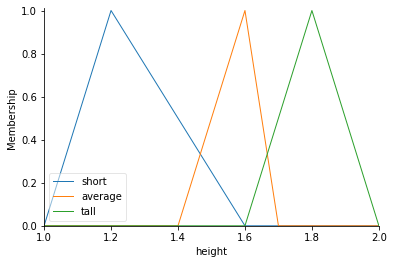

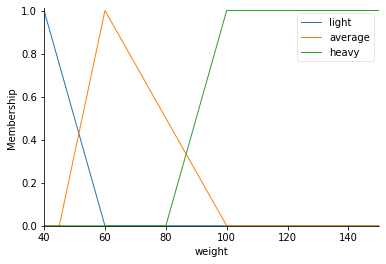

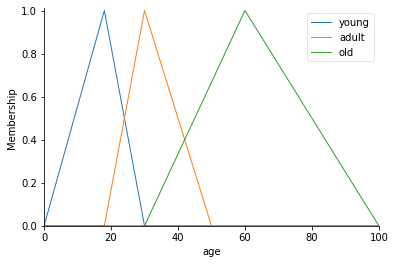

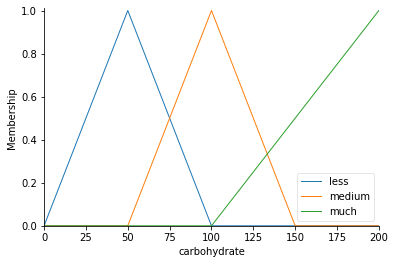

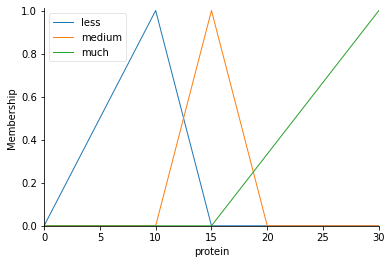

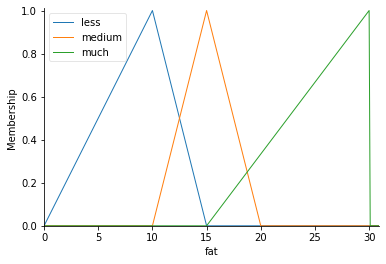

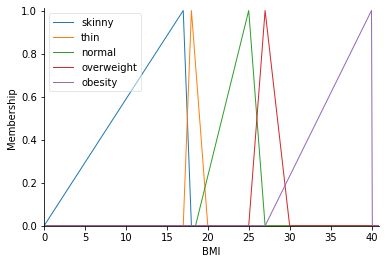

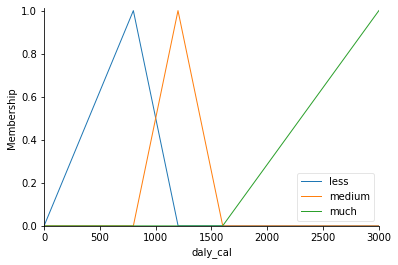

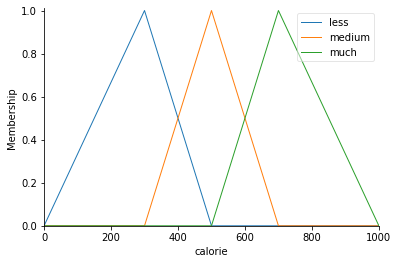

In [ ]:
height['short']=fuzz.trimf(height.universe,[1,1.2,1.6])
height['average']=fuzz.trimf(height.universe,[1.4,1.6,1.7])
height['tall']=fuzz.trimf(height.universe,[1.6,1.8,2.0])

weight['light']=fuzz.trimf(weight.universe,[40,40,60])
weight['average']=fuzz.trimf(weight.universe,[45,60,100])
weight['heavy']=fuzz.trapmf(weight.universe,[80,100,150,150])

age['young']=fuzz.trimf(age.universe,[0,18,30])
age['adult']=fuzz.trimf(age.universe,[18,30,50])
age['old']=fuzz.trimf(age.universe,[30,60,100])

carbohydrate['less']=fuzz.trimf(carbohydrate.universe,[0,50,100])
carbohydrate['medium']=fuzz.trimf(carbohydrate.universe,[50,100,150])
carbohydrate['much']=fuzz.trimf(carbohydrate.universe,[100,200,200])

protein['less']=fuzz.trimf(protein.universe,[0,10,15])
protein['medium']=fuzz.trimf(protein.universe,[10,15,20])
protein['much']=fuzz.trimf(protein.universe,[15,30,30])

fat['less']=fuzz.trimf(fat.universe,[0,10,15])
fat['medium']=fuzz.trimf(fat.universe,[10,15,20])
fat['much']=fuzz.trimf(fat.universe,[15,30,30])

BMI['skinny']=fuzz.trimf(BMI.universe,[0,17,18])
BMI['thin']=fuzz.trimf(BMI.universe,[17,18,20])
BMI['normal']=fuzz.trimf(BMI.universe,[18.5,25,27])
BMI['overweight']=fuzz.trimf(BMI.universe,[25,27,30])
BMI['obesity']=fuzz.trimf(BMI.universe,[27,40,40])

daly_cal['less']=fuzz.trimf(daly_cal.universe,[0,800,1200])
daly_cal['medium']=fuzz.trimf(daly_cal.universe,[800,1200,1600])
daly_cal['much']=fuzz.trimf(daly_cal.universe,[1600,3000,3000])

calorie['less']=fuzz.trimf(calorie.universe,[0,300,500])
calorie['medium']=fuzz.trimf(calorie.universe,[300,500,700])
calorie['much']=fuzz.trimf(calorie.universe,[500,700,1000])

height.view()
weight.view()
age.view()
carbohydrate.view()
protein.view()
fat.view()
BMI.view()
daly_cal.view()
calorie.view()

In [ ]:
#make rules
rule1a=ctrl.Rule(height['tall']&weight['light'],BMI['skinny'])
rule2a=ctrl.Rule(height['tall']&weight['average'],BMI['thin'])
rule3a=ctrl.Rule(height['tall']&weight['heavy'],BMI['normal'])
rule4a=ctrl.Rule(height['average']&weight['light'],BMI['thin'])
rule5a=ctrl.Rule(height['average']&weight['average'],BMI['normal'])
rule6a=ctrl.Rule(height['average']&weight['heavy'],BMI['overweight'])
rule7a=ctrl.Rule(height['short']&weight['light'],BMI['normal'])
rule8a=ctrl.Rule(height['short']&weight['average'],BMI['overweight'])
rule9a=ctrl.Rule(height['short']&weight['heavy'],BMI['obesity'])

rule1b=ctrl.Rule(age['young']&BMI['skinny'],daly_cal['much'])
rule2b=ctrl.Rule(age['young']&BMI['thin'],daly_cal['much'])
rule3b=ctrl.Rule(age['young']&BMI['normal'],daly_cal['medium'])
rule4b=ctrl.Rule(age['young']&BMI['overweight'],daly_cal['less'])
rule5b=ctrl.Rule(age['young']&BMI['obesity'],daly_cal['less'])
rule6b=ctrl.Rule(age['adult']&BMI['skinny'],daly_cal['much'])
rule7b=ctrl.Rule(age['adult']&BMI['thin'],daly_cal['much'])
rule8b=ctrl.Rule(age['adult']&BMI['normal'],daly_cal['medium'])
rule9b=ctrl.Rule(age['adult']&BMI['overweight'],daly_cal['less'])
rule10b=ctrl.Rule(age['adult']&BMI['obesity'],daly_cal['less'])
rule11b=ctrl.Rule(age['old']&BMI['skinny'],daly_cal['much'])
rule12b=ctrl.Rule(age['old']&BMI['thin'],daly_cal['much'])
rule13b=ctrl.Rule(age['old']&BMI['normal'],daly_cal['medium'])
rule14b=ctrl.Rule(age['old']&BMI['overweight'],daly_cal['less'])
rule15b=ctrl.Rule(age['old']&BMI['obesity'],daly_cal['less'])

rule1c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['less'],calorie['less'])
rule2c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['medium'],calorie['less'])
rule3c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['much'],calorie['medium'])
rule4c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['less'],calorie['less'])
rule5c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['medium'],calorie['medium'])
rule6c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['much'],calorie['medium'])
rule7c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['less'],calorie['medium'])
rule8c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['medium'],calorie['medium'])
rule9c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['much'],calorie['much'])
rule10c=ctrl.Rule(carbohydrate['medium']&fat['less']&protein['less'],calorie['less'])
rule11c=ctrl.Rule(carbohydrate['medium']&fat['less']&protein['medium'],calorie['less'])
rule12c=ctrl.Rule(carbohydrate['medium']&fat['less']&protein['much'],calorie['medium'])
rule13c=ctrl.Rule(carbohydrate['medium']&fat['medium']&protein['less'],calorie['medium'])
rule14c=ctrl.Rule(carbohydrate['medium']&fat['medium']&protein['medium'],calorie['medium'])
rule15c=ctrl.Rule(carbohydrate['medium']&fat['medium']&protein['much'],calorie['much'])
rule16c=ctrl.Rule(carbohydrate['medium']&fat['much']&protein['less'],calorie['medium'])
rule17c=ctrl.Rule(carbohydrate['medium']&fat['much']&protein['medium'],calorie['much'])
rule18c=ctrl.Rule(carbohydrate['medium']&fat['much']&protein['much'],calorie['much'])
rule19c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['less'],calorie['less'])
rule20c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['medium'],calorie['less'])
rule21c=ctrl.Rule(carbohydrate['less']&fat['less']&protein['much'],calorie['medium'])
rule22c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['less'],calorie['less'])
rule23c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['medium'],calorie['medium'])
rule24c=ctrl.Rule(carbohydrate['less']&fat['medium']&protein['much'],calorie['medium'])
rule25c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['less'],calorie['medium'])
rule26c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['medium'],calorie['much'])
rule27c=ctrl.Rule(carbohydrate['less']&fat['much']&protein['much'],calorie['much'])




2455.5555555555434


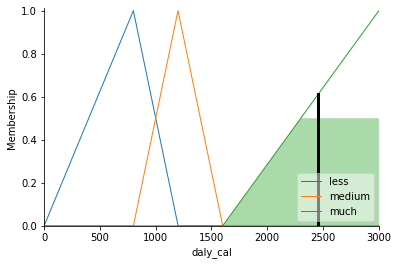

In [ ]:
# calculate daly calories needs
daly_need_control=ctrl.ControlSystem([rule1a,rule2a,rule3a,rule4a,rule5a,rule6a,rule7a,rule8a,rule9a,rule1b,rule2b,rule3b,rule4b,rule5b,rule6b,rule7b,rule8b,rule9b])
daly_need=ctrl.ControlSystemSimulation(daly_need_control)
daly_need.input['height']=1.7
daly_need.input['weight']=70
daly_need.input['age']=21
daly_need.compute()
print(daly_need.output['daly_cal'])
daly_cal.view(sim=daly_need)

742.2222222222257


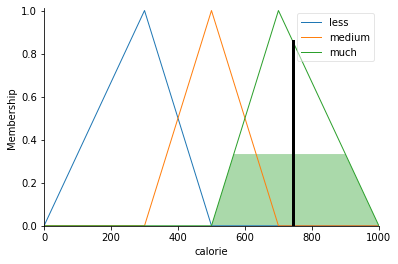

In [ ]:
# calculate calories in foods
food_calories_control=ctrl.ControlSystem([rule1c,rule2c,rule3c,rule4c,rule5c,rule6c,rule7c,rule8c,rule9c,rule10c,rule11c,rule12c,rule13c,rule14c,rule15c,rule16c,rule17c,rule18c,
                                          rule19c,rule20c,rule21c,rule22c,rule23c,rule24c,rule25c,rule26c,rule27c])
food_calories=ctrl.ControlSystemSimulation(food_calories_control)
food_calories.input['carbohydrate']=120
food_calories.input['fat']=20
food_calories.input['protein']=15
food_calories.compute()
print(food_calories.output['calorie'])
calorie.view(sim=food_calories)